In [17]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display import display, SVG
from rxn_chemutils.depict import smiles_depict_url
from sklearn.cluster import KMeans, Birch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, normalize

In [18]:
from rxn_class_token.clustering.data_loading import (
    load_df, FP_COLUMN, RXN_SMILES_COLUMN, DATA_CSV_PATH
)


In [19]:
from rxn_class_token.clustering.clusterer import ClustererFitter, inspect_clusters

In [20]:
# Setting environment variables

%env DATA_CSV_PATH =/Users/ato/Desktop/df.dummy.with-reagents.valid.csv
%env FPS_SAVE_PATH =/Users/ato/Desktop/df.dummy.with-reagents.valid.fps.pkl
%env FPS_MODEL_PATH =/Users/ato/Desktop/Git/rxnfp/rxnfp/models/transformers/bert_ft

env: DATA_CSV_PATH=/Users/ato/Desktop/df.dummy.with-reagents.valid.csv
env: FPS_SAVE_PATH=/Users/ato/Desktop/df.dummy.with-reagents.valid.fps.pkl
env: FPS_MODEL_PATH=/Users/ato/Desktop/Git/rxnfp/rxnfp/models/transformers/bert_ft


In [21]:
# ### Loading dataset

# + tags=[]
df = load_df()
fps = np.array(df[FP_COLUMN].tolist())
print(fps.shape)
df.head()
# -

(999, 256)


,rxn,rxnclasses,classes,fps
0,C1COCCO1.CC#N.Cc1c(-c2ccc(CNC(=O)OC(C)(C)C)c(F...,6.1.1,6,"[-0.4497775137424469, -0.010969303548336029, -..."
1,CC(=O)[O-]~[K+].CC1(C)OB(B2OC(C)(C)C(C)(C)O2)O...,9.7.20,9,"[0.7694625854492188, 1.5005640983581543, 2.108..."
2,CO.COC(=O)c1cc(C2CC2)c2c(C)c(-c3ccc4c(c3)NC(=O...,6.2.2,6,"[-0.30523520708084106, -0.07858694344758987, -..."
3,CC(C)Cc1ccc(-c2c(Cl)cc(N)cc2Cl)cc1C#N.CCC(=O)O...,2.1.2,2,"[-1.8986597061157227, 2.0795974731445312, -1.2..."
4,CC(C)Cc1ccc(-c2c(Cl)cc(N)cc2Cl)cc1C#N.CCN(C(C)...,2.1.2,2,"[-2.2551887035369873, 1.8038413524627686, -1.3..."


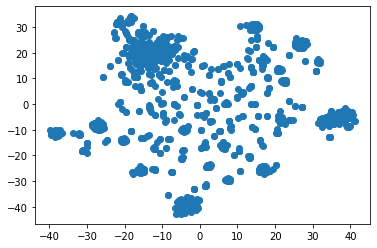

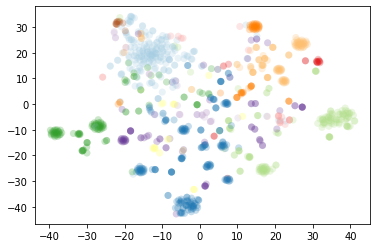

In [22]:
# ### TSNE plot on data

tsne_subset = 5000
tsne_fps = fps[:, :]
tsne_projection = TSNE().fit_transform(tsne_fps)
plt.scatter(*tsne_projection.T)
plt.show()

labels_sub = df['classes'].tolist() #[:tsne_subset]
color_palette = sns.color_palette('Paired', 48)
cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in labels_sub]
plt.scatter(*tsne_projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)
plt.show()

In [23]:
# ### Clustering functionality


def get_stats(
    clusterer: ClustererFitter, df: pd.DataFrame, data: np.ndarray, print_plots: bool = True
):
    df = df.copy()

    kmean_class = clusterer.predict(data)
    df['kmeans_class'] = kmean_class.tolist()

    grouped_df = df.groupby(['classes', 'kmeans_class']).size().unstack(fill_value=0)
    print(grouped_df.to_string())

    pred_matrix = grouped_df.to_numpy()

    if print_plots:
        _ = plt.subplots(figsize=(10, 7))
        normalized_array = normalize(pred_matrix, norm="l1")
        plt.imshow(normalized_array)
        plt.show()

        _ = plt.subplots(figsize=(10, 7))
        normalized_array = normalize(pred_matrix, norm="l1", axis=0)
        plt.imshow(normalized_array)
        plt.show()


def show_in_tsne(clusterer):
    labels_sub = clusterer.predict(tsne_fps)
    color_palette = sns.color_palette('Paired', 48)
    cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in labels_sub]
    plt.scatter(*tsne_projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)
    plt.show()

kmeans_class  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22   23  24  25  26  27  28  29
classes                                                                                                                              
0              2  23   0   0   0  21  13   2   0   0   0   1   1   0   0   1   0   1   0   0  20   0   2  101   0   1   2   0   0   2
1              0   1   0  54   0   0   3   0  17   0   0   0   0  21  19  25   0  22   0   0   0  19   0    0   0   1   6   9   0   7
2              4   1  75   0   0   0   1   0   1  30   0   0   0   0   0   0   3   0   0   1   1   1   8    1   0   9  16   0   0   0
3              3   1   0   0  33  12   3   0   0   0   0   0  40   1   1   1   2   2   0   4   0   0   0    1   0   0   0   1   3   0
4              4   1   0   0   0   2   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0  13    0   0   0   2   1   1   0
5              0   0   0   0   0   0   0   0   0   0  10   0  

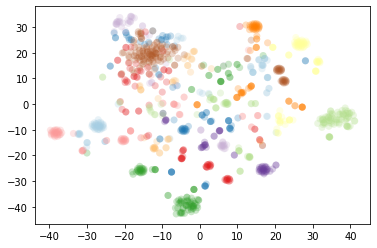

kmeans_class  0   1   2   3    4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19
classes                                                                                      
0             56   0   0   1  125   0   1   0   0   1   0   0   1   0   2   3   0   2   0   1
1              3   0  22   0    2   0  42  53   0   4  33   0  39   0   0   0   0   0   0   6
2              0  16   2   0    2  70   0   0   0  13   0   3   0  40   0   0   2   0   2   2
3              7   0   0  36    5   0   3   6   1   1   2   4   5   1  27   0   0   0   0  10
4              7   1   1   0    0   0   0   0   0   0   0   0   0   0   0  14   0   0   0   2
5              0  12   0   0    0   0   2   0   0   0   1   0   0   0   0   1   0   0   0   1
6              0   0   0   0    5   0   6   0  50   0   0   0   0   0   0   0  39   4   3   2
7              1   0   0   0    0   0   0   0   0   0   0   0   0   0   0   0   0  25  22   1
8              6   0   0   0    0   0   0   0   0   7   0   

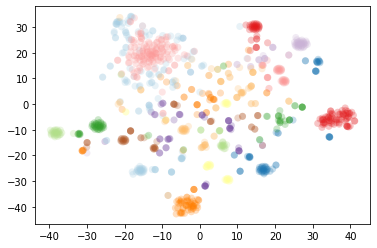

kmeans_class  0   1   2   3    4   5   6   7   8   9   10  11  12  13  14
classes                                                                  
0              0  42   0   1  143   2   0   0   2   0   0   0   2   0   1
1              0   4   0   1    2  21  14  63   0  36   0  34  19   7   3
2             76   2  38   0    2   0   0   0   0  13   0   0   4  10   7
3              0   6   1  10    7  64   0   7   0   0   0   2   1   4   6
4              0   1   0   2    3   0   0   0   0   1   0   0  14   2   2
5              0   0   0   0    0   0   0   0   0   2  12   1   0   1   1
6              0   1   0   0    5   0  47   0   4   0  47   0   0   5   0
7              0   0   0   0    1   0   1   0  25   0   0   0   0  22   0
8              0   6   0   0    1   0   0   0   0   5   0   0   0   0  10
9              0   2   2  23    1   0   2   1  14   8   0   1  12   1   9
10             0   1   0   3    0   0   0   4   0   2   0   0   2   0  20
11             0  12   0   0    0   0 

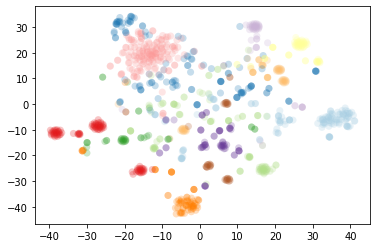

kmeans_class  0    1   2   3   4   5   6   7   8   9   10  11  12  13  14
classes                                                                  
0              2  174   0   1   0   0  10   0   3   1   0   0   1   1   0
1              2    4  48   0   5  36   5   0  16   4   0  52  32   0   0
2             55    3   0   0  13   1   1  70   6   2   0   0   1   0   0
3              0    6   0  73   3   0  24   0   0   1   0   0   1   0   0
4              0    2   0   0   3   0   6   0  14   0   0   0   0   0   0
5             10    0   0   0   4   1   0   0   0   2   0   0   0   0   0
6              0    5   0   1   0   0   0   0   1  44  31   0   0   0  27
7              0    1   0   0   0   0   0   0   4  16   0   0   0  28   0
8              3    5   0   0  11   0   3   0   0   0   0   0   0   0   0
9              2    4   3  14  15   0   6   0   8   5   0   0   0  19   0
10             3    0   2   0  17   0  10   0   0   0   0   0   0   0   0
11             1   11   0   0   0   0 

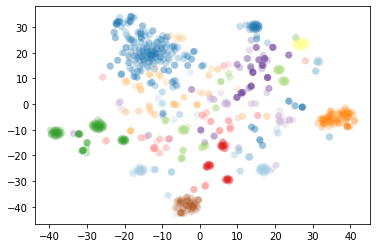

kmeans_class    0    1    2
classes                    
0               5  180    8
1              92    4  108
2             118    2   32
3              82    8   18
4               5    7   13
5              10    0    7
6              47    5   57
7              26    1   22
8               0    6   16
9              38    3   35
10              2    0   30
11              0   12    0


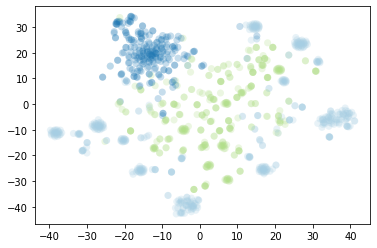

In [25]:
# ### Tests - try out different clustering approaches

clusterer = ClustererFitter(data=fps, scaler=PCA(n_components=30), clusterer=KMeans(n_clusters=30))
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

clusterer = ClustererFitter(data=fps, scaler=PCA(n_components=10), clusterer=KMeans(n_clusters=20))
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

clusterer = ClustererFitter(data=fps, scaler=StandardScaler(), clusterer=KMeans(n_clusters=15))
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

clusterer = ClustererFitter(data=fps, scaler=StandardScaler(), clusterer=Birch(n_clusters=15))
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

clusterer = ClustererFitter(data=fps, scaler=StandardScaler(), clusterer=KMeans(n_clusters=3))
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

In [26]:
# ### Optimal PCA dimension
#
# https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

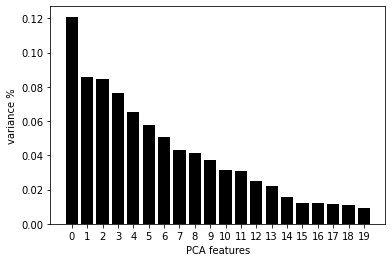

In [34]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(fps)
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)  # Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

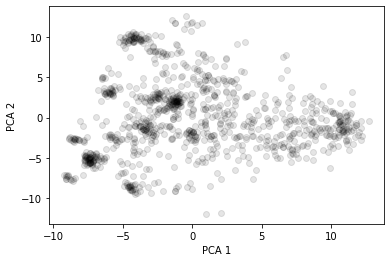

In [30]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

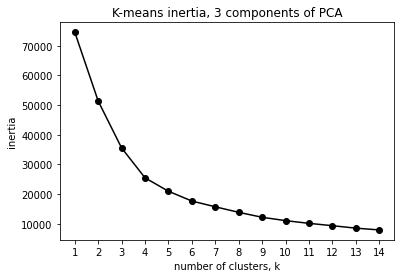

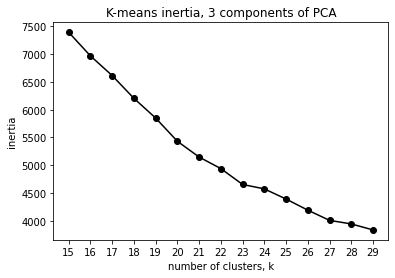

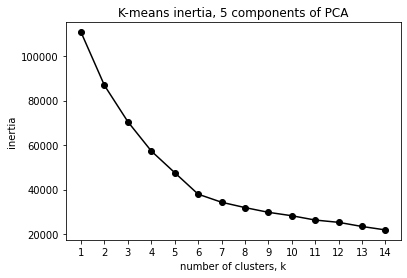

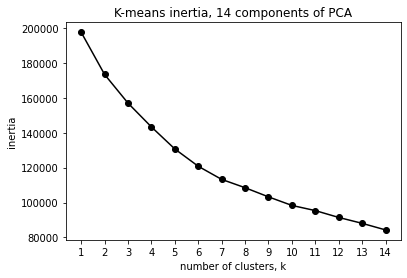

In [37]:
# ### Find k-means elbow
#
# https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2


def elbow_curve(
    components_df: pd.DataFrame, n_components: int, plot_from: int = 1, plot_until: int = 15
):
    ks = range(plot_from, plot_until)

    inertias = []
    for k in ks:
        # Create a KMeans instance with k clusters: model
        model = KMeans(n_clusters=k)

        # Fit model to samples
        model.fit(components_df.iloc[:, :n_components])

        # Append the inertia to the list of inertias
        inertias.append(model.inertia_)

    plt.plot(ks, inertias, '-o', color='black')
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.title(f'K-means inertia, {n_components} components of PCA')
    plt.show()


elbow_curve(PCA_components, n_components=3)

elbow_curve(PCA_components, n_components=3, plot_from=15, plot_until=30)

elbow_curve(PCA_components, n_components=5)

elbow_curve(PCA_components, n_components=14)

kmeans_class   0   1   2   3    4    5
classes                               
0              3  11   0   2  175    2
1              0  48   0  22    4  130
2              2  26  78   0    2   44
3              1  15   0  72    8   12
4              1  15   4   0    5    0
5             10   6   0   0    0    1
6             90  14   0   0    5    0
7             31  16   0   1    1    0
8              0  16   0   0    6    0
9             11  28   5  16    3   13
10             0  26   0   0    0    6
11             0   0   0   0   12    0


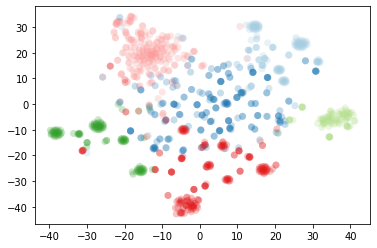

In [39]:
# ### Selected clustering

selected_n_components = 14
selected_n_clusters = 6

clusterer = ClustererFitter(
    data=fps,
    scaler=PCA(n_components=selected_n_components),
    clusterer=KMeans(n_clusters=selected_n_clusters)
)
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

Cluster no 0
CO.O=[N+]([O-])c1cc(C(F)(F)F)ccc1O.[Pd]>>Nc1cc(C(F)(F)F)ccc1O


CCCCCCC.COC(=O)C(C)(C)c1ccnc(NS(=O)(=O)C2CC2)n1.COc1cncc(-c2ccc(N)cc2)n1.Cc1ccccc1.O>>COc1cncc(-c2ccc(NC(=O)C(C)(C)c3ccnc(NS(=O)(=O)C4CC4)n3)cc2)n1


CC(=O)Nc1ccc(F)c2c1C(C)=CC2(C)C.O.O=S(=O)(O)O>>CC1=CC(C)(C)c2c(F)ccc(N)c21


Cc1nc(C)c(Nc2ncnc(-c3ccc(O[C@H]4CCN(C(=O)OC(C)(C)C)C[C@H]4F)c(C#N)c3)n2)s1.ClCCl.O=C(O)C(F)(F)F>>Cc1nc(C)c(Nc2ncnc(-c3ccc(O[C@H]4CCNC[C@H]4F)c(C#N)c3)n2)s1


CC(C)(C)OC(=O)OC(=O)OC(C)(C)C.CC(C)(N)C(=O)O.CCN(CC)CC.CO.[Na+]~[OH-]>>CC(C)(C)OC(=O)NC(C)(C)C(=O)O
[INVALID]






Cluster no 1
CCOC(C)(OCC)OCC.Nc1cc(Br)cc(F)c1O>>Fc1cc(Br)cc2ncoc12


CC(C)[C@H](NC(=O)OC(C)(C)C)C(=O)O.CCN(C(C)C)C(C)C.CN(C)C=O.COC[C@@H](C)O.ClCCCl.O~On1nnc2ccccc21>>COC[C@H](C)OC(=O)[C@H](NC(=O)OC(C)(C)C)C(C)C
[INVALID]
CC(C)(c1ccc2ncccc2c1)n1nnc2ccc(-c3cnn(CCOC4CCCCO4)c3)nc21.CC1(C)C2CCC1(CS(=O)(=O)O)C(=O)C2.CO.O>>CC(C)(c1ccc2ncccc2c1)n1nnc2ccc(-c3cnn(CCO)c3)nc21


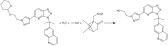

CC(C)O.CCN(CC)CC.CO.COc1c(C(C)n2nc(C)c3c(N)ncnc32)cc(Cl)c(C)c1C1CNC1~Cl~Cl.C[C@H]1CO1>>COc1c(C(C)n2nc(C)c3c(N)ncnc32)cc(Cl)c(C)c1C1CN(C[C@H](C)O)C1
[INVALID]
COc1ccc(S(C)(=O)=O)c2[nH]c3cc(Br)cnc3c12.Cc1nnn(C)c1-c1cnc2c3ccc(S(C)(=O)=O)cc3n([C@H](c3ccccc3)C3CCOCC3)c2c1>>COc1ccc(S(C)(=O)=O)c2c1c1ncc(Br)cc1n2[C@H](c1ccccc1)C1CCOCC1


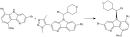







Cluster no 2
CC#N.CCN(C(C)C)C(C)C.CN(C)C(On1nnc2cccnc21)=[N+](C)C~F[P-](F)(F)(F)(F)F.CN(C)C=O.C[C@@H](O)C(=O)O.C[C@H]1C[C@H](Oc2ccc(-c3ncnc(Nc4ccc(N5CCN(C6COC6)CC5)cc4)n3)cc2C#N)[C@H](F)CN1.O>>C[C@H]1CC(Oc2ccc(-c3ncnc(Nc4ccc(N5CCN(C6COC6)CC5)cc4)n3)cc2C#N)[C@H](F)CN1C(=O)[C@@H](C)O
[INVALID]
CCCP1(=O)OP(=O)(CCC)OP(=O)(CCC)O1.CCN(CC)CC.COc1cc(OC)c(Cl)c(NC(=O)N(C)c2cc(Nc3ccccc3N)ncn2)c1Cl.ClCCl.O=C(O)/C=C\Cl>>COc1cc(OC)c(Cl)c(NC(=O)N(C)c2cc(Nc3ccccc3NC(=O)/C=C\Cl)ncn2)c1Cl


CCN(C(C)C)C(C)C.CN(C)C(On1nnc2cccnc21)=[N+](C)C~F[P-](F)(F)(F)(F)F.CN(C)C=O.COc1cc(Nc2ncnc(-c3ccc(O[C@H]4CCNCC4(F)F)c(C#N)c3)n2)ccc1N1CCN(C2COC2)CC1.O=C(O)[C@@H](O)CO>>COc1cc(Nc2ncnc(-c3ccc(O[C@H]4CCN(C(=O)[C@@H](O)CO)CC4(F)F)c(C#N)c3)n2)ccc1N1CCN(C2COC2)CC1
[INVALID]
CCN(CC)CC.CCN(c1cc(Br)cc(C(=O)O)c1C)C1CCOCC1.CS(C)=O.Cc1cc(C(C)C)c(CN)c(=O)[nH]1.F[P-](F)(F)(F)(F)F~c1ccc2c(c1)nnn2O[P+](N1CCCC1)(N1CCCC1)N1CCCC1>>CCN(c1cc(Br)cc(C(=O)NCc2c(C(C)C)cc(C)[nH]c2=O)c1C)C1CCOCC1
[INVALID]
CCN(CC)CC.CCn1c(=O)cc(C2CCC(=O)CC2)c2cc(C(=O)O)ccc21.CNc1ccc(Cl)cc1.ClCCl.O=C1OCCN1P(=O)(Cl)N1CCOC1=O>>CCn1c(=O)cc(C2CCC(=O)CC2)c2cc(C(=O)N(C)c3ccc(Cl)cc3)ccc21


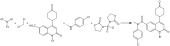







Cluster no 3
C1COCCO1.CN(C)C=O.COc1ccc(CN2Cc3c(F)c(N[C@H](CC(C)C)C(N)=O)nc(Cl)c3C2=O)c(OC)c1.N#Cc1ccc(B(O)O)s1.O=C(/C=C/c1ccccc1)/C=C/c1ccccc1~O=C(/C=C/c1ccccc1)/C=C/c1ccccc1~O=C(/C=C/c1ccccc1)/C=C/c1ccccc1~[Pd]~[Pd].c1ccc(-c2ccccc2P(C2CCCCC2)C2CCCCC2)cc1>>COc1ccc(CN2Cc3c(F)c(N[C@H](CC(C)C)C(N)=O)nc(-c4ccc(C#N)s4)c3C2=O)c(OC)c1
[INVALID]
CC(C)(C)OC(=O)N1CC[C@H](Oc2ccc(B3OC(C)(C)C(C)(C)O3)cc2C#N)[C@H](F)C1.CCOC(=O)c1ncsc1Nc1ncnc(Cl)n1.COCCOC.O=C([O-])[O-]~[Na+]~[Na+].c1ccc([P](c2ccccc2)(c2ccccc2)[Pd]([P](c2ccccc2)(c2ccccc2)c2ccccc2)([P](c2ccccc2)(c2ccccc2)c2ccccc2)[P](c2ccccc2)(c2ccccc2)c2ccccc2)cc1>>CCOC(=O)c1ncsc1Nc1ncnc(-c2ccc(O[C@H]3CCN(C(=O)OC(C)(C)C)C[C@H]3F)c(C#N)c2)n1
[INVALID]
C1COCCO1.CC(=O)[O-]~CC(=O)[O-]~[Pd+2].CC1(C)c2cccc(P(c3ccccc3)c3ccccc3)c2Oc2c(P(c3ccccc3)c3ccccc3)cccc21.COC(=O)c1cccc(Br)c1F.COc1ccc(OC)c(P(C2CCCCC2)C2CCCCC2)c1-c1c(C(C)C)cc(C(C)C)cc1C(C)C~Cl[Pd+]~NCCc1[c-]cccc1.Cc1nnn(C)c1-c1cnc(Cl)c(N)c1.ClC(Cl)Cl.O=C([O-])[O-]~[Cs+]~[Cs+].[Fe+2]~c1ccc(P(c2ccccc2

CC(C)(C)OC(=O)NCCCCCNC(=O)CS.CCN(CC)CC.CN(C)C=O.O.O=C(O)c1cc(N2C(=O)C=CC2=O)ccc1-c1c2ccc(=O)cc-2oc2cc(O)ccc12>>CC(C)(C)OC(=O)NCCCCCNC(=O)CSC1CC(=O)N(c2ccc(-c3c4ccc(=O)cc-4oc4cc(O)ccc34)c(C(=O)O)c2)C1=O


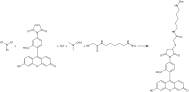







Cluster no 5
C1CCOC1~CS(C)=O.CC(C)(C)[O-]~[K+].CCOC(C)=O.CS(=O)(=O)NC(=O)c1cc(Cl)c(F)cc1F.CS(C)=O.OCC1CN(C(c2ccccc2)c2ccccc2)C1>>CS(=O)(=O)NC(=O)c1cc(Cl)c(OCC2CN(C(c3ccccc3)c3ccccc3)C2)cc1F
[INVALID]
CN(C)C=O.COc1ccc(CCl)cc1C.Cc1ccnc2c(C(=O)N[C@H]3CCCC[C@@H]3O)c[nH]c12.O=C(O[Cs])O[Cs]>>COc1ccc(Cn2cc(C(=O)N[C@H]3CCCC[C@@H]3O)c3nccc(C)c32)cc1C


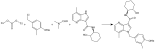

CN(C)C=O.O.O=C(CBr)c1ccccc1.O=C([O-])[O-]~[K+]~[K+].OC1(c2ccccc2)CC2CNCC2C1>>O=C(CN1CC2CC(O)(c3ccccc3)CC2C1)c1ccccc1
[INVALID]
CC(C)[Si](O[C@H]1C[C@H](N)C[C@@H]1CO)(C(C)C)C(C)C.CCOC(C)=O.CN(C)C=O.O=C([O-])[O-]~[K+]~[K+].O=C(c1cc(Br)c(Cl)s1)c1cncnc1Cl>>CC(C)[Si](O[C@H]1C[C@H](Nc2ncncc2C(=O)c2cc(Br)c(Cl)s2)C[C@@H]1CO)(C(C)C)C(C)C
[INVALID]
CC#N.CI.COC(=O)c1cc(Br)cc(NC2CCCCC2)c1C.O=C(O[Cs])O[Cs]>>COC(=O)c1cc(Br)cc(N(C)C2CCCCC2)c1C


In [40]:
# ### Reaction analysis


def render_smiles(smiles: str):
    try:
        print(smiles)
        display(SVG(url=smiles_depict_url(smiles)))
    except Exception:
        print('[INVALID]')


n_show = 5
df['kmeans_class'] = clusterer.predict(fps)
for i in range(clusterer.n_clusters):
    print('Cluster no', i)
    rxn_smiles = df.loc[df['kmeans_class'] == i][RXN_SMILES_COLUMN].tolist()
    for rxn in random.sample(rxn_smiles, n_show):
        render_smiles(rxn)
    print('\n\n\n\n\n')